In [1]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is F8EE-2CF5

 Directory of C:\Users\Subham\Desktop\ujwal

21-11-2019  17:31    <DIR>          .
21-11-2019  17:31    <DIR>          ..
21-11-2019  16:53    <DIR>          .ipynb_checkpoints
21-11-2019  16:49             8,318 500_Person_Gender_Height_Weight_Index.csv
21-11-2019  17:31           467,842 health prediction.ipynb
               2 File(s)        476,160 bytes
               3 Dir(s)  462,822,711,296 bytes free


In [2]:
import numpy as np
import pandas as pd


In [37]:
data=pd.read_csv('500_Person_Gender_Height_weight_Index.csv')
data_visual=pd.read_csv('500_Person_Gender_Height_weight_Index.csv')
print(data.head())
data.iloc[:,-1]

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


0      4
1      2
2      4
3      3
4      3
5      3
6      5
7      5
8      3
9      4
10     2
11     4
12     3
13     2
14     2
15     5
16     5
17     5
18     5
19     5
20     5
21     5
22     4
23     5
24     2
25     3
26     3
27     1
28     5
29     5
      ..
470    5
471    5
472    2
473    5
474    3
475    4
476    5
477    2
478    2
479    5
480    5
481    4
482    5
483    4
484    4
485    4
486    5
487    2
488    4
489    5
490    2
491    5
492    0
493    1
494    5
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [4]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [38]:
print(data_visual.head())
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [39]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


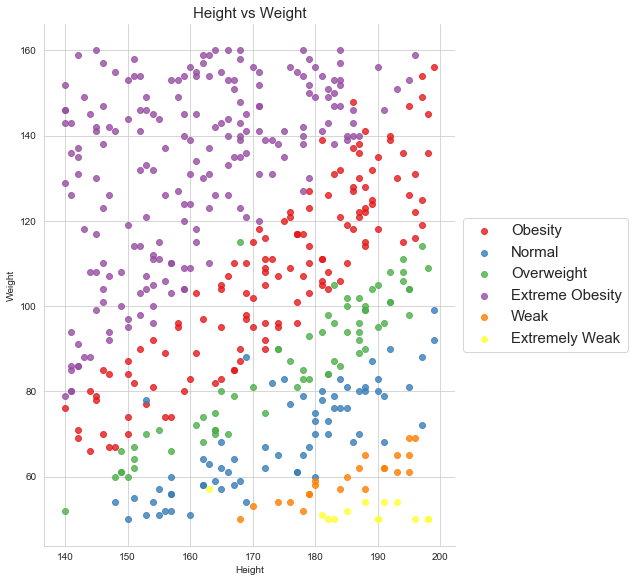

In [45]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

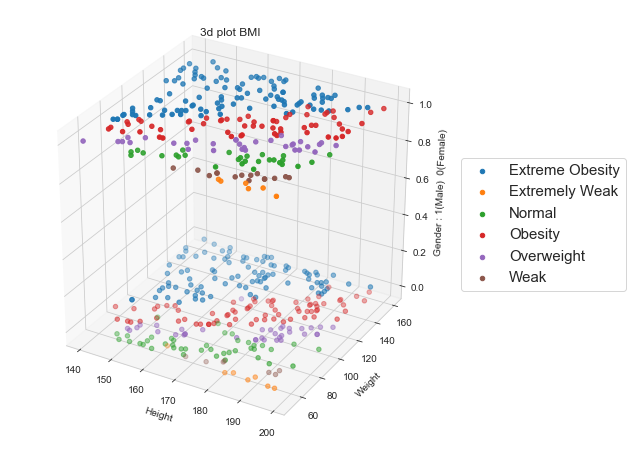

In [46]:
groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(data_visual['Height'],data_visual['Weight'] , data_visual['gender_lbl'], 
#            c=data_visual['Index'],
#            cmap=matplotlib.colors.ListedColormap(colors))


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

In [10]:
people = data_visual['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [11]:
categories = data_visual['Status'].value_counts() 
categories

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

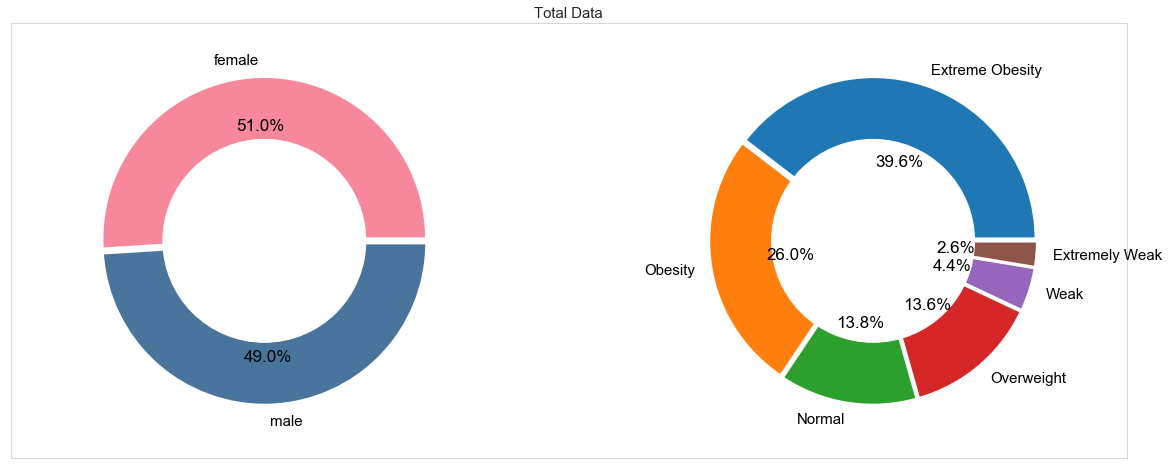

In [47]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [49]:
data_visual_male = data_visual[data_visual['Gender']=='Male']
data_visual_male.shape

(245, 6)

In [14]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

In [15]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [16]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Extremely Weak      7
Weak                7
Name: Status, dtype: int64

Text(0, 0, 'Male')

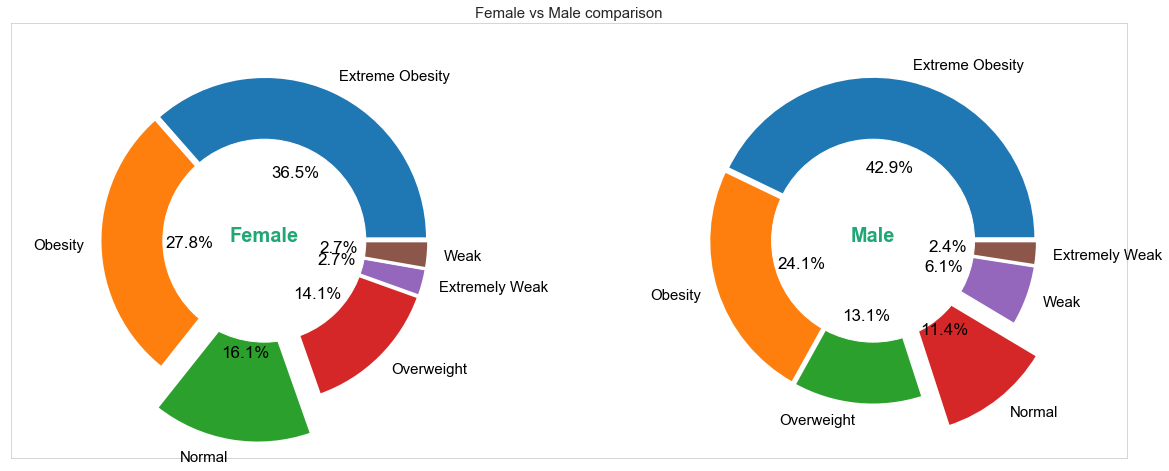

In [17]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')
# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

In [18]:
data.iloc[:,0]

0        Male
1        Male
2      Female
3      Female
4        Male
5        Male
6        Male
7        Male
8        Male
9      Female
10       Male
11     Female
12     Female
13       Male
14       Male
15     Female
16     Female
17       Male
18       Male
19       Male
20       Male
21     Female
22     Female
23       Male
24     Female
25     Female
26       Male
27       Male
28     Female
29       Male
        ...  
470      Male
471      Male
472    Female
473      Male
474    Female
475      Male
476    Female
477      Male
478    Female
479    Female
480    Female
481    Female
482    Female
483      Male
484    Female
485      Male
486    Female
487      Male
488      Male
489    Female
490    Female
491    Female
492    Female
493    Female
494      Male
495    Female
496    Female
497    Female
498      Male
499      Male
Name: Gender, Length: 500, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl_enc = LabelEncoder()
data.iloc[:,0] = lbl_enc.fit_transform(data.iloc[:,0])
one_hot_enc_for_gender = OneHotEncoder(categorical_features = [0])
data = one_hot_enc_for_gender.fit_transform(data).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [20]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4
0,0.0,1.0,174.0,96.0,4.0
1,0.0,1.0,189.0,87.0,2.0
2,1.0,0.0,185.0,110.0,4.0
3,1.0,0.0,195.0,104.0,3.0
4,0.0,1.0,149.0,61.0,3.0


In [21]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])

In [22]:
df.head()

,0,1,2,3,4
0,-1.020204,1.020204,0.247939,-0.309117,4.0
1,-1.020204,1.020204,1.164872,-0.587322,2.0
2,0.980196,-0.980196,0.920357,0.123647,4.0
3,0.980196,-0.980196,1.531645,-0.061823,3.0
4,-1.020204,1.020204,-1.280283,-1.391027,3.0


In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [52]:
print(type(X_train))
X_train.head() 

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
107,-1.020204,1.020204,-0.668995,1.483762
336,0.980196,-0.980196,-0.179963,1.452850
71,-1.020204,1.020204,0.492454,0.340029
474,0.980196,-0.980196,-0.179963,-0.834616
6,-1.020204,1.020204,-1.402541,-0.432764


In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([5., 5., 4., 5., 5., 5., 3., 5., 4., 5., 2., 4., 2., 5., 5., 3., 5.,
       3., 5., 5., 4., 3., 3., 4., 2., 1., 5., 4., 4., 2., 2., 5., 5., 5.,
       4., 0., 5., 4., 5., 2., 5., 4., 4., 5., 4., 3., 5., 2., 5., 5., 4.,
       4., 3., 5., 5., 3., 4., 4., 0., 4., 4., 4., 4., 1., 4., 4., 2., 4.,
       5., 5., 5., 5., 3., 4., 4., 5., 4., 5., 5., 5., 5., 3., 4., 5., 5.,
       3., 5., 5., 5., 4., 2., 2., 3., 1., 3., 1., 4., 4., 0., 3.])

In [28]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  8,  2,  0,  0],
       [ 0,  0,  1, 12,  2,  0],
       [ 0,  0,  1,  0, 28,  3],
       [ 0,  0,  0,  0,  0, 36]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

91.0

In [57]:
def trees_in_forest_vs_acc(trees, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [31]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.9, 0.91, 0.91, 0.9, 0.9, 0.9]

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.90
1,200,0.91
2,300,0.91
3,500,0.90
4,700,0.90


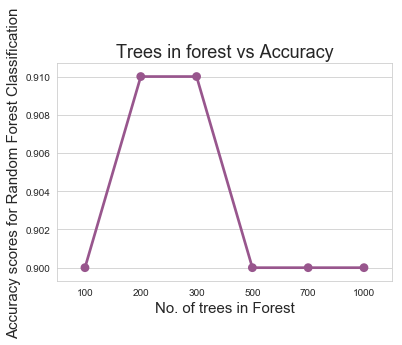

In [32]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()

In [58]:
def health_test(gender, height, weight):
    '''Input gender as Male/Female, height in cm, weight in Kg'''
    individual_data_dict = {'Gender':gender, 'Height':height, 'Weight':weight}   
    individual_data = pd.DataFrame(data = individual_data_dict, index=[0])
    individual_data.iloc[:,0] = lbl_enc.transform(individual_data.iloc[:,0])
    individual_data = one_hot_enc_for_gender.transform(individual_data).toarray()
    df = pd.DataFrame(individual_data)
    df.iloc[:,:] = std_sc.transform(df.iloc[:,:])
    y_pred = rfc.predict(individual_data)
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'


In [59]:
sample_person = ['Male',90,70]
sample_result = health_test(*sample_person)
sample_result

'Obesity'